In [1]:
from datageneration import * 
from diffusion_crt import *
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [2]:
# download the data from https://s3.amazonaws.com/capitalbikeshare-data/index.html
df = pd.read_csv('display/202312-capitalbikeshare-tripdata.csv')
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,1BAE05FA18A67F9E,classic_bike,2023-12-01 12:48:34,2023-12-01 13:01:10,Columbia Rd & Georgia Ave NW,31115.0,Massachusetts Ave & Dupont Circle NW,31200.0,38.928121,-77.023795,38.910100,-77.044400,member
1,3F5DEF2E9B6CE0CD,classic_bike,2023-12-05 08:36:01,2023-12-05 08:56:44,Columbia Rd & Georgia Ave NW,31115.0,17th St & Rhode Island Ave NW,31210.0,38.928121,-77.023795,38.906767,-77.038627,member
2,0B644635561ABE2F,electric_bike,2023-12-21 08:37:31,2023-12-21 08:45:59,Columbia Rd & Georgia Ave NW,31115.0,17th St & Rhode Island Ave NW,31210.0,38.928080,-77.023815,38.906767,-77.038627,member
3,5CEDE65040883F18,classic_bike,2023-12-13 18:51:12,2023-12-13 19:06:19,2nd St & Seaton Pl NE,31522.0,17th St & Rhode Island Ave NW,31210.0,38.914751,-77.003560,38.906767,-77.038627,member
4,5ACA893110A3EC36,electric_bike,2023-12-22 13:41:38,2023-12-22 13:53:32,Rosedale Rec Center,31658.0,7th & K St NW,31653.0,38.897855,-76.979632,38.902674,-77.021392,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277037,68A1AA2C614921C4,classic_bike,2023-12-16 00:08:39,2023-12-16 00:16:30,11th & S St NW,31280.0,17th & P St NW,31330.0,38.913601,-77.027115,38.909858,-77.038566,member
277038,25C0FB40A035EA7C,classic_bike,2023-12-06 18:23:32,2023-12-06 18:27:26,Eastern Market / 7th & North Carolina Ave SE,31610.0,Massachusetts Ave & 6th St NE,31657.0,38.886952,-76.996806,38.892934,-76.998273,member
277039,969BD21B0E2F499A,electric_bike,2023-12-09 17:47:53,2023-12-09 18:03:16,8th & D St NW,31270.0,16th & R St NW,31282.0,38.894771,-77.023308,38.912652,-77.036278,casual
277040,DEA9A4BA005B1A26,electric_bike,2023-12-09 18:14:52,2023-12-09 18:25:48,5th & F St NW,31620.0,Lincoln Rd & Seaton Pl NE/Harry Thomas Rec Center,31523.0,38.897282,-77.019359,38.915000,-77.007800,casual


In [3]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [4]:
df_xyz = df[['started_at','ended_at','start_lat','start_lng','end_lat','end_lng','member_casual']]

In [5]:
df_xyz

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual
0,2023-12-01 12:48:34,2023-12-01 13:01:10,38.928121,-77.023795,38.910100,-77.044400,member
1,2023-12-05 08:36:01,2023-12-05 08:56:44,38.928121,-77.023795,38.906767,-77.038627,member
2,2023-12-21 08:37:31,2023-12-21 08:45:59,38.928080,-77.023815,38.906767,-77.038627,member
3,2023-12-13 18:51:12,2023-12-13 19:06:19,38.914751,-77.003560,38.906767,-77.038627,member
4,2023-12-22 13:41:38,2023-12-22 13:53:32,38.897855,-76.979632,38.902674,-77.021392,member
...,...,...,...,...,...,...,...
277037,2023-12-16 00:08:39,2023-12-16 00:16:30,38.913601,-77.027115,38.909858,-77.038566,member
277038,2023-12-06 18:23:32,2023-12-06 18:27:26,38.886952,-76.996806,38.892934,-76.998273,member
277039,2023-12-09 17:47:53,2023-12-09 18:03:16,38.894771,-77.023308,38.912652,-77.036278,casual
277040,2023-12-09 18:14:52,2023-12-09 18:25:48,38.897282,-77.019359,38.915000,-77.007800,casual


In [6]:
df_xyz['started_at'] = pd.to_datetime(df_xyz['started_at'])
df_xyz['ended_at'] = pd.to_datetime(df_xyz['ended_at'])

# 计算 duration（单位分钟）
df_xyz['duration_second'] = (df_xyz['ended_at'] - df_xyz['started_at']).dt.total_seconds() 

# 对 member_casual 做 one-hot 编码
df_xyz_onehot = pd.get_dummies(df_xyz, columns=['member_casual'], prefix='type')
onehot_cols = ['type_casual', 'type_member']
df_xyz_onehot[onehot_cols] = df_xyz_onehot[onehot_cols].astype(float)

In [7]:
df_xyz_onehot

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,duration_second,type_casual,type_member
0,2023-12-01 12:48:34,2023-12-01 13:01:10,38.928121,-77.023795,38.910100,-77.044400,756.0,0.0,1.0
1,2023-12-05 08:36:01,2023-12-05 08:56:44,38.928121,-77.023795,38.906767,-77.038627,1243.0,0.0,1.0
2,2023-12-21 08:37:31,2023-12-21 08:45:59,38.928080,-77.023815,38.906767,-77.038627,508.0,0.0,1.0
3,2023-12-13 18:51:12,2023-12-13 19:06:19,38.914751,-77.003560,38.906767,-77.038627,907.0,0.0,1.0
4,2023-12-22 13:41:38,2023-12-22 13:53:32,38.897855,-76.979632,38.902674,-77.021392,714.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
277037,2023-12-16 00:08:39,2023-12-16 00:16:30,38.913601,-77.027115,38.909858,-77.038566,471.0,0.0,1.0
277038,2023-12-06 18:23:32,2023-12-06 18:27:26,38.886952,-76.996806,38.892934,-76.998273,234.0,0.0,1.0
277039,2023-12-09 17:47:53,2023-12-09 18:03:16,38.894771,-77.023308,38.912652,-77.036278,923.0,1.0,0.0
277040,2023-12-09 18:14:52,2023-12-09 18:25:48,38.897282,-77.019359,38.915000,-77.007800,656.0,1.0,0.0


<Axes: xlabel='duration_second', ylabel='Density'>

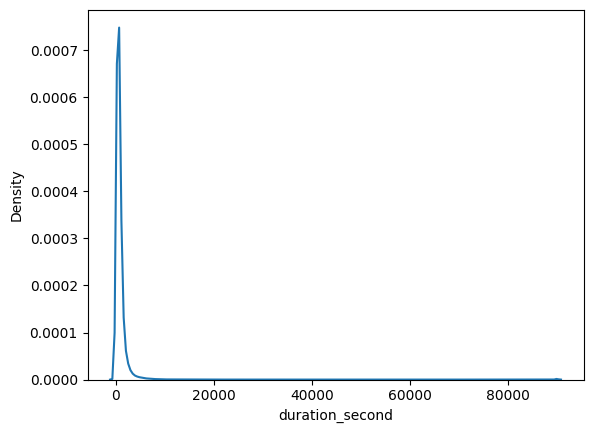

In [8]:
sns.kdeplot(df_xyz_onehot['duration_second'])

In [9]:
df_only_xyz = df_xyz_onehot[['duration_second','type_casual','type_member','start_lat','start_lng','end_lat','end_lng']]
df_only_xyz = df_only_xyz[df_only_xyz['duration_second'] <= 7000].dropna()
df_only_xyz

,duration_second,type_casual,type_member,start_lat,start_lng,end_lat,end_lng
0,756.0,0.0,1.0,38.928121,-77.023795,38.910100,-77.044400
1,1243.0,0.0,1.0,38.928121,-77.023795,38.906767,-77.038627
2,508.0,0.0,1.0,38.928080,-77.023815,38.906767,-77.038627
3,907.0,0.0,1.0,38.914751,-77.003560,38.906767,-77.038627
4,714.0,0.0,1.0,38.897855,-76.979632,38.902674,-77.021392
...,...,...,...,...,...,...,...
277037,471.0,0.0,1.0,38.913601,-77.027115,38.909858,-77.038566
277038,234.0,0.0,1.0,38.886952,-76.996806,38.892934,-76.998273
277039,923.0,1.0,0.0,38.894771,-77.023308,38.912652,-77.036278
277040,656.0,1.0,0.0,38.897282,-77.019359,38.915000,-77.007800


In [10]:
df_final_55000 = df_only_xyz.sample(n=55000, random_state=114)  # 固定随机种子以复现
df_final_55000

,duration_second,type_casual,type_member,start_lat,start_lng,end_lat,end_lng
34684,362.0,1.0,0.0,38.896960,-77.004930,38.897274,-76.994749
124433,1537.0,0.0,1.0,38.871841,-77.005910,38.884058,-76.986385
225406,375.0,0.0,1.0,38.810000,-77.050000,38.810000,-77.060000
270663,350.0,0.0,1.0,38.890400,-77.088900,38.898984,-77.078317
6167,528.0,0.0,1.0,38.885100,-77.002300,38.897222,-77.019347
...,...,...,...,...,...,...,...
261509,250.0,0.0,1.0,39.121327,-77.164969,39.125828,-77.167059
79366,603.0,1.0,0.0,38.900358,-77.012108,38.900358,-77.012108
13953,356.0,0.0,1.0,38.944551,-77.063896,38.930282,-77.055599
266918,282.0,0.0,1.0,38.889908,-76.983326,38.900413,-76.982872


In [11]:
df_final_55000 = df_final_55000.astype(np.float32)

In [12]:
device = torch.device('cuda:0')
yyy = df_final_55000.values[:50000,0:1]
xxx = df_final_55000.values[:50000,1:3]
zzz = df_final_55000.values[:50000,3:]

yyy_crt = df_final_55000.values[50000:,0:1]
xxx_crt = df_final_55000.values[50000:,1:3]
zzz_crt = df_final_55000.values[50000:,3:]

In [13]:
def transform(x):
    return np.log(x)-np.log(1-x)

def re_transform(x):
    return 1/(1+np.exp(-x))

def normalize(fX):
    fXn = (fX - fX.min())/(fX.max()-fX.min())
    return fXn

In [14]:
xxx = transform((normalize(xxx)+0.01)/1.02)
yyy = transform((normalize(yyy)+0.01)/1.02)
zzz = transform((normalize(zzz)+0.01)/1.02)
xxx_crt = transform((normalize(xxx_crt)+0.01)/1.02)
yyy_crt = transform((normalize(yyy_crt)+0.01)/1.02)
zzz_crt = transform((normalize(zzz_crt)+0.01)/1.02)

In [15]:
_,samples=perform_diffusion_crt(xxx, yyy, zzz, xxx_crt, yyy_crt, zzz_crt, 
                                repeat=1, device=torch.device('cuda:0'), 
                                num_epoch = 200,batch_size = 50000,hidden_dim = 128,lr = 1e-3, 
                                # it is too slow to train such a big dataset, so i set mega big batch size and small epoch
                                # it depends on your gpu memory
                                verbose=True, seed=777, stat='cmi',sampling_model='ddpm',return_samples=True)

training diffusion model
0 1.0050971508026123
1 0.994518518447876
2 0.9789791703224182
3 0.9685021638870239
4 0.9610375761985779
5 0.9493929743766785
6 0.9165177345275879
7 0.9141049981117249
8 0.900822103023529
9 0.8662193417549133
10 0.8519885540008545
11 0.8073998093605042
12 0.7867879271507263
13 0.7477195262908936
14 0.7109380960464478
15 0.6689156293869019
16 0.6316312551498413
17 0.6031254529953003
18 0.5880696773529053
19 0.576569676399231
20 0.5774869918823242
21 0.5880041718482971
22 0.6094331741333008
23 0.6084486842155457
24 0.5919168591499329
25 0.5875712633132935
26 0.562853217124939
27 0.5470248460769653
28 0.5443066358566284
29 0.5330605506896973
30 0.5361295938491821
31 0.5259971618652344
32 0.5216658711433411
33 0.5327631235122681
34 0.5287845134735107
35 0.5261268615722656
36 0.5152209997177124
37 0.5140650868415833
38 0.5037444829940796
39 0.4878826439380646
40 0.4847217798233032
41 0.48355382680892944
42 0.47863247990608215
43 0.480900377035141
44 0.467568188905715

Text(0.5, 1.0, 'ddpm, capital bikeshare data')

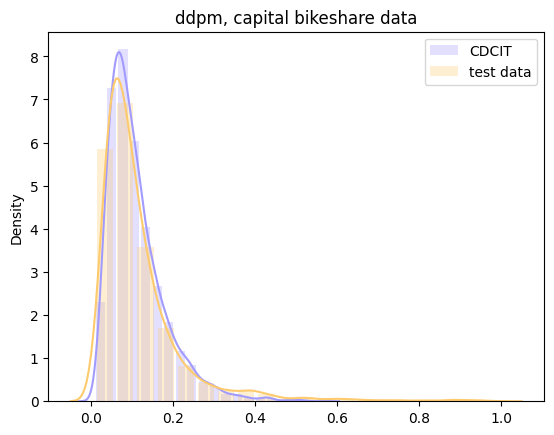

In [16]:
sns.distplot(re_transform(samples.view(-1).detach().cpu().numpy()), 
             hist=True, 
             bins=20, 
             hist_kws={"histtype": "barstacked", "rwidth":0.8, "linewidth": 0.5,"alpha": 0.3}, 
             color = '#a29bfe', label = 'CDCIT')
sns.distplot(re_transform(yyy_crt).reshape(-1), 
             hist=True, 
             bins=20, 
             hist_kws={"histtype": "barstacked", "rwidth":0.8, "linewidth": 0.5,"alpha": 0.3}, 
             color = '#fdcb6e', label = 'test data')
plt.legend()
plt.title('ddpm, capital bikeshare data')